In [38]:
!pip install matplotlib

In [39]:
%matplotlib inline

In [40]:
import random
import math
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
import numpy as np

In [41]:
#!pip install deap


In [42]:
# Ensure reproducibility
random.seed(42)

In [43]:
# Benchmark Functions
def rastrigin(individual):
    return sum(x**2 - 10 * math.cos(2 * math.pi * x) + 10 for x in individual),


In [44]:
def rosenbrock(individual):
    return sum(100.0*(individual[i+1]-individual[i]**2)**2 + (1-individual[i])**2 for i in range(len(individual)-1)),


In [45]:
# Genetic Algorithm Setup
def create_individual(dim):
    return creator.Individual([random.uniform(-5.12, 5.12) for _ in range(dim)])


In [46]:
def evaluate(individual):
    return sum(x**2 for x in individual),

In [47]:
def setup_toolbox(dim, function):
    toolbox = base.Toolbox()
    toolbox.register("attribute", random.uniform, -5.12, 5.12)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attribute, n=dim)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    # Use the specific benchmark function for evaluation
    toolbox.register("evaluate", function)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    return toolbox

def genetic_algorithm(dim, function, generations=100, population_size=50, cxpb=0.7, mutpb=0.2):
    toolbox = setup_toolbox(dim, function)

    population = toolbox.population(n=population_size)

    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    # Apply the evolutionary process
    try:
        algorithms.eaMuPlusLambda(population, toolbox, mu=population_size, lambda_=population_size, cxpb=cxpb, mutpb=mutpb, ngen=generations, stats=None, halloffame=None, verbose=True)
    except KeyboardInterrupt:
        pass  # Gracefully handle keyboard interrupt

    # Return the best individual
    return tools.selBest(population, k=1)[0]

# The rest of the functions (run_trials, plot_convergence, etc.) remain mostly unchanged

if __name__ == "__main__":
    # The main execution logic remains as is
    pass

In [48]:
# Multiple Trials
def run_trials(dim, function, num_trials=15):
    best_results = []
    for _ in range(num_trials):
        best_individual = genetic_algorithm(dim, function)
        best_results.append(best_individual.fitness.values[0])
    return best_results

In [49]:
#Visualization
def plot_convergence(results):
    plt.plot(results, marker='o')
    plt.xlabel('Trial')
    plt.ylabel('Best Fitness Value')
    plt.title('Convergence of Genetic Algorithm')
    plt.show()

In [50]:
def plot_convergence(results, dimension, benchmark_function):
    label = f"{benchmark_function.__name__} - {dimension}D"
    plt.plot(results, marker='o', label=label)

Streaming output truncated to the last 5000 lines.
27 	45    
28 	46    
29 	44    
30 	47    
31 	41    
32 	42    
33 	43    
34 	39    
35 	48    
36 	47    
37 	45    
38 	45    
39 	47    
40 	45    
41 	43    
42 	42    
43 	46    
44 	46    
45 	46    
46 	44    
47 	44    
48 	44    
49 	44    
50 	45    
51 	47    
52 	46    
53 	44    
54 	49    
55 	43    
56 	47    
57 	48    
58 	43    
59 	47    
60 	46    
61 	44    
62 	44    
63 	47    
64 	45    
65 	45    
66 	45    
67 	40    
68 	46    
69 	46    
70 	44    
71 	44    
72 	45    
73 	47    
74 	44    
75 	46    
76 	39    
77 	45    
78 	45    
79 	46    
80 	45    
81 	40    
82 	46    
83 	45    
84 	46    
85 	40    
86 	44    
87 	50    
88 	44    
89 	49    
90 	40    
91 	48    
92 	44    
93 	42    
94 	45    
95 	48    
96 	44    
97 	46    
98 	42    
99 	48    
100	44    
Best Individual: [-3.0317588843394, -17137454412.12548]
Interquartile Range (IQR) of Best Performances: 979018066376.7764
Top 3 Best Pe

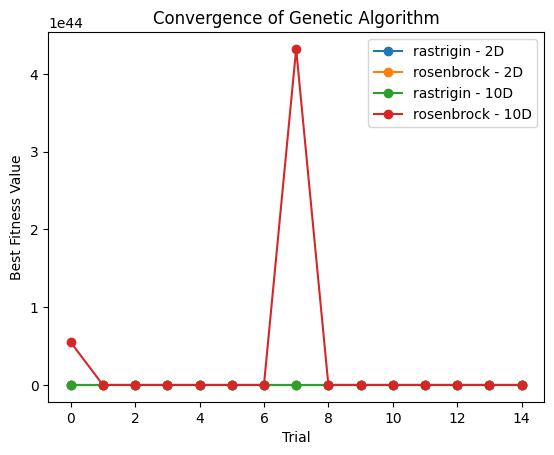

In [51]:
if __name__ == "__main__":
    # Parameters
    dimensions = [2, 10]  # You can add more dimensions if needed
    benchmark_functions = [rastrigin, rosenbrock]
    num_trials = 15

    for dim in dimensions:
        for function in benchmark_functions:
            print(f"Running Genetic Algorithm on {function.__name__} with {dim} dimensions...")
            best_results = run_trials(dim, function, num_trials)
            print(f"Best Performance: {min(best_results)}")
            print(f"Worst Performance: {max(best_results)}")
            print(f"Average Performance: {sum(best_results) / num_trials}")

            # Calculate and print standard deviation
            std_dev = math.sqrt(sum((result - (sum(best_results) / num_trials))**2 for result in best_results) / num_trials)
            print(f"Standard Deviation of Best Performances: {std_dev}")

            # Calculate and print range
            result_range = max(best_results) - min(best_results)
            print(f"Range of Best Performances: {result_range}")

            # Identify and print the best individual for reference
            best_individual = genetic_algorithm(dim, function, generations=100, population_size=50)
            print(f"Best Individual: {best_individual}")

            # Calculate and print interquartile range (IQR)
            q3, q1 = np.percentile(best_results, [75, 25])
            iqr = q3 - q1
            print(f"Interquartile Range (IQR) of Best Performances: {iqr}")

            # Print the top 3 best performances
            top_3_best = sorted(best_results)[:3]
            print(f"Top 3 Best Performances: {top_3_best}")

            # plot_convergence(best_results)
            plot_convergence(best_results, dim, function)
plt.legend()
plt.xlabel('Trial')
plt.ylabel('Best Fitness Value')
plt.title('Convergence of Genetic Algorithm')
plt.show()